# 📧 SMS Spam Classification using Machine Learning

## 📑 Table of Contents
1. Project Overview  
2. Dataset & Sources  
3. Setup (Requirements)  
4. Load & Clean Data  
5. Exploratory Data Analysis (EDA)  
6. Text Preprocessing  
7. Train/Test Split & Pipeline  
8. Model Training & Evaluation  
9. Model Comparison & Feature Insights  
10. Save & Inference  
11. Conclusion & Future Work


# <span style="color:#2E86C1">👩‍💻 About the Author</span>

**<span style="color:#AF7AC5">Javeria Jameel</span>** —  
<span style="color:#566573">Data Scientist (Python • SQL • ML & Analytics) based in Pakistan.</span>  

I build practical, portfolio-ready projects that turn raw data into clear insights and deployable models.  
My focus areas include **<span style="color:#28B463">NLP</span>**, **<span style="color:#D68910">Recommender Systems</span>**, and **<span style="color:#E74C3C">Predictive Modeling</span>**,  
with a strong grounding in **statistics** and **data visualization**.

---

## <span style="color:#CA6F1E">⚡ Skills & Tools</span>
- 🐍 **Languages & ML:** Python, scikit-learn, NumPy, pandas, matplotlib, plotly  
- 🗄️ **Data & BI:** SQL, MySQL Workbench, Power BI, Tableau  
- 📊 **Topics:** NLP (text classification), Recommendation Systems, Classification/Regression, EDA  
- 🛠️ **Tools:** Jupyter/Colab, Git/GitHub , streamlit  

---
 
## <span style="color:#F39C12">🎓 Education</span>
-  **BSCS 2nd Semester** — Virtual University of Pakistan  
- Continual learning in **Data Science & Machine Learning**  

---

## <span style="color:#2ECC71">🌍 Find Me</span>
- 🔗 GitHub: [https://github.com/JaveriaJameel]  
- 🔗 Kaggle: [https://www.kaggle.com/]  


---

> *<span style="color:#7D3C98">Open to internships and junior data roles; happy to collaborate on open-source DS/ML projects.</span>*


# SMS Spam Collection Dataset

## 📚 About Dataset

The **SMS Spam Collection** is a set of SMS tagged messages that have been collected for SMS Spam research.  
It contains **5,574 SMS messages in English**, each tagged as either:

- `ham` – legitimate message  
- `spam` – unsolicited message

---

## 📄 Content

Each line in the dataset contains **two columns**:

- `v1`: The label – either `ham` or `spam`
- `v2`: The raw text message

---

## 📥 Data Sources

This dataset has been compiled from several publicly available sources:

1. **Grumbletext Web Site**
   - 425 spam messages were **manually extracted**.
   - Grumbletext is a UK forum where users report SMS spam.
   - **Extraction** involved scanning hundreds of pages to identify message content.
   - 🌐 [Web Link] (not provided)

2. **NUS SMS Corpus (NSC)**
   - 3,375 ham messages were randomly selected.
   - Collected by the Department of Computer Science, National University of Singapore.
   - Messages were contributed by volunteers who gave consent.
   - 🌐 [Web Link] (not provided)

3. **Caroline Tag's PhD Thesis**
   - 450 ham messages were extracted.
   - 🌐 [Web Link] (not provided)

4. **SMS Spam Corpus v.0.1 Big**
   - 1,002 ham messages
   - 322 spam messages
   - Publicly available.
   - 🌐 [Web Link] (not provided)

---

## 📖 Academic Usage

This dataset has been used in several academic research projects.

If you use this dataset in your work, please cite the following source and reference the official webpage:

- 🌐 [http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)

### 📄 Citation

> Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A.  
> *Contributions to the Study of SMS Spam Filtering: New Collection and Results.*  
> Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11),  
> Mountain View, CA, USA, 2011.

---

## ✅ Summary

- Total messages: **5,574**
- Labels: `ham`, `spam`
- Source: Multiple research-grade corpora
- Language: **English**
- Format: CSV-like (`label`, `message` per line)


# 📊 Dataset Information — SMS Spam Collection

The dataset contains **5,574 SMS messages**, each labeled as either **spam** or **ham** (not spam).  

---

## 📝 Columns Description

| Column | Description |
|--------|-------------|
| **v1** | The **label** of the message:<br> - `ham` → legitimate (not spam)<br> - `spam` → unwanted/spam message |
| **v2** | The **text message content** (SMS body) as raw text. |
| **Unnamed: 2, 3, 4** | Extra/empty columns in the CSV file. They don’t contain useful data and can be safely dropped during preprocessing. |

---

## ✅ Final Columns Used in Project

After cleaning the dataset, we keep only:

- **`label`** → Encoded version of `v1`  
  - `0` = ham  
  - `1` = spam  

- **`message`** → SMS text (from `v2`)  

---


# 🛠️  Import Required Libraries

# 📥  Load and Clean the Dataset

In [2]:
# !pip install nltk wordcloud

# 🔧 Data handling
import pandas as pd
import numpy as np

# 🎨 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 📝 Text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Enhanced preprocessing function
url_pat = r'https?://\S+|www\.\S+'
email_pat = r'\b[\w\.-]+@[\w\.-]+\.\w+\b'
phone_pat = r'\b(\+?\d[\d\-\s]{7,}\d)\b'
money_pat = r'£|\$|€'
nonalpha_pat = r'[^a-z0-9\s]'

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(url_pat, ' url ', text)
    text = re.sub(email_pat, ' email ', text)
    text = re.sub(phone_pat, ' phone ', text)
    text = re.sub(money_pat, ' money ', text)
    text = re.sub(nonalpha_pat, ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]
    return ' '.join(words)

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASC\AppData\Roaming\nltk_data...


In [3]:
# 📂 Load dataset
spam = pd.read_csv("spam.csv", encoding="latin-1")

# 🗑️ Drop unnecessary columns
spam = spam[['v1', 'v2']]

# 🏷️ Rename columns
spam.columns = ['label', 'message']

# 🔢 Encode labels (ham=0, spam=1)
spam['label'] = spam['label'].map({'ham': 0, 'spam': 1})

# 🧹 Apply preprocessing
spam['clean_msg'] = spam['message'].apply(preprocess_text)

# 🔍 Quick check
print("Before cleaning sample:")
print(spam['message'].head(3))
print("\nAfter cleaning sample:")
print(spam['clean_msg'].head(3))

# 📊 Dataset info
print("\nDataset Info:")
print(spam.info())


Before cleaning sample:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: message, dtype: object

After cleaning sample:
0    jurong point crazy available bugis great world...
1                                   lar joking wif oni
2    free entry wkly comp win cup final tkts 21st m...
Name: clean_msg, dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   int64 
 1   message    5572 non-null   object
 2   clean_msg  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


# 📊 Step 4 — Exploratory Data Analysis (EDA)


To better understand the dataset and uncover hidden insights, we perform the following analysis steps:

---

### 1. 📊 Class Distribution  
We first check the distribution of **Ham (0)** vs **Spam (1)** messages to see if the dataset is balanced or skewed.

---

### 2. 📏 Message Length Analysis  
We create a new feature `msg_length` that measures the length of each message. Then, we visualize how message lengths differ between Ham and Spam messages.

---

### 3. ☁️ WordCloud Visualization  
Using the cleaned text, we generate **WordClouds** for both Ham and Spam messages to visually identify the most frequent words.

---

### 4. 📊 Top 20 Most Common Words  
We analyze the frequency of words in Ham and Spam messages separately and visualize the **Top 20 words** using bar plots.

---

### 5. 📌 Bigram & Trigram Analysis  
We extend our analysis beyond single words to identify the most frequent **bigrams (2-word phrases)** and **trigrams (3-word phrases)** in Ham and Spam messages.

---

### 6. 📊 Correlation Heatmap  
We engineer additional features (`msg_length`, `word_count`, `char_count`) and plot a **correlation heatmap** to see how they relate to the target label.

---


C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\272388101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=spam, palette='Set2')


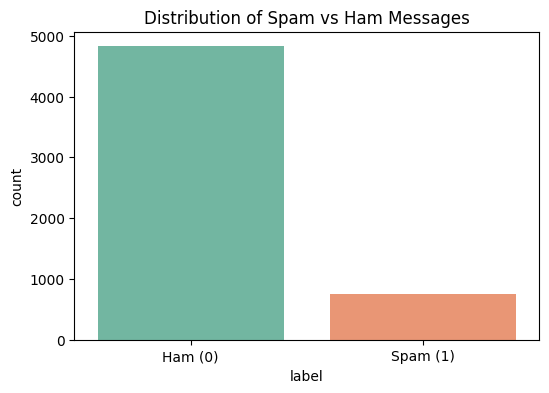

label
0    4825
1     747
Name: count, dtype: int64


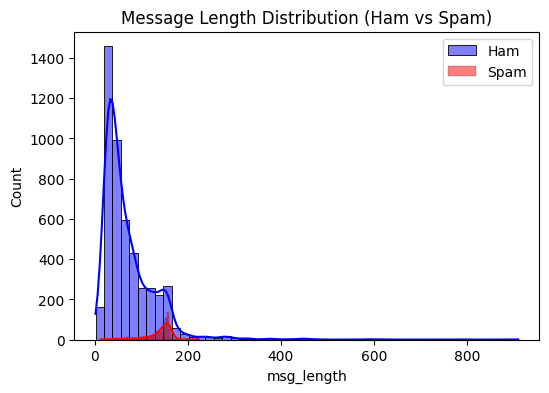

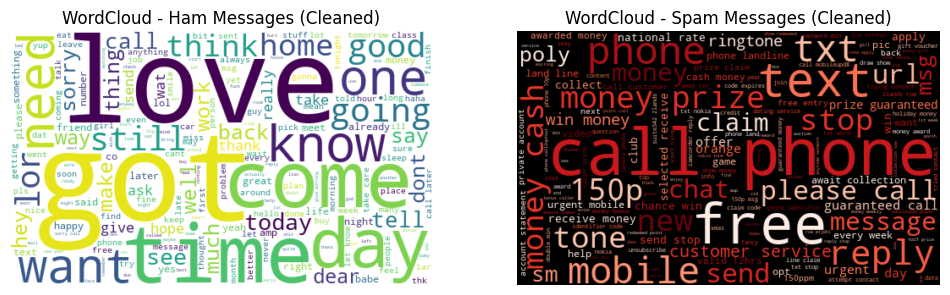

C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\272388101.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=ham_df, ax=axes[0], palette='Blues_r')
C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\272388101.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=spam_df, ax=axes[1], palette='Reds_r')


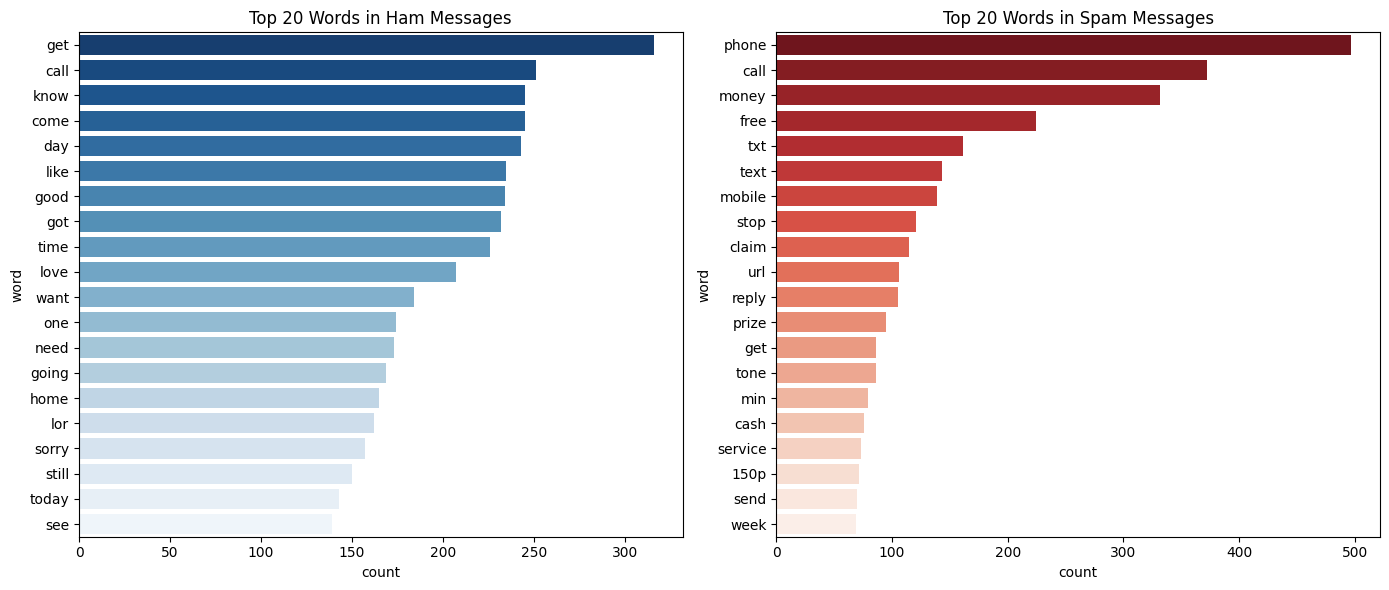

In [4]:
# 1. 📊 Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=spam, palette='Set2')
plt.xticks([0,1], ['Ham (0)', 'Spam (1)'])
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

# Print counts
print(spam['label'].value_counts())

# 2. 📏 Message Length Feature (using raw text)
spam['msg_length'] = spam['message'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(spam[spam['label']==0]['msg_length'], bins=50, color='blue', label='Ham', kde=True)
sns.histplot(spam[spam['label']==1]['msg_length'], bins=50, color='red', label='Spam', kde=True)
plt.legend()
plt.title("Message Length Distribution (Ham vs Spam)")
plt.show()

# 3. ☁️ WordClouds (using clean text for better clarity)
ham_words = ' '.join(spam[spam['label']==0]['clean_msg'])
spam_words = ' '.join(spam[spam['label']==1]['clean_msg'])

ham_wc = WordCloud(width=500, height=300, background_color='white').generate(ham_words)
spam_wc = WordCloud(width=500, height=300, background_color='black', colormap='Reds').generate(spam_words)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud - Ham Messages (Cleaned)")

plt.subplot(1,2,2)
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud - Spam Messages (Cleaned)")
plt.show()

# 4. 📊 Top 20 Most Common Words (Ham vs Spam)
from collections import Counter

# Tokenize cleaned messages
ham_tokens = ' '.join(spam[spam['label']==0]['clean_msg']).split()
spam_tokens = ' '.join(spam[spam['label']==1]['clean_msg']).split()

# Count frequencies
ham_freq = Counter(ham_tokens).most_common(20)
spam_freq = Counter(spam_tokens).most_common(20)

# Convert to DataFrame
ham_df = pd.DataFrame(ham_freq, columns=['word', 'count'])
spam_df = pd.DataFrame(spam_freq, columns=['word', 'count'])

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(y='word', x='count', data=ham_df, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 20 Words in Ham Messages")

sns.barplot(y='word', x='count', data=spam_df, ax=axes[1], palette='Reds_r')
axes[1].set_title("Top 20 Words in Spam Messages")

plt.tight_layout()
plt.show()


C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\967488299.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ngram', x='count', data=ham_bigrams, ax=axes[0], palette='Blues_r')
C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\967488299.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ngram', x='count', data=spam_bigrams, ax=axes[1], palette='Reds_r')


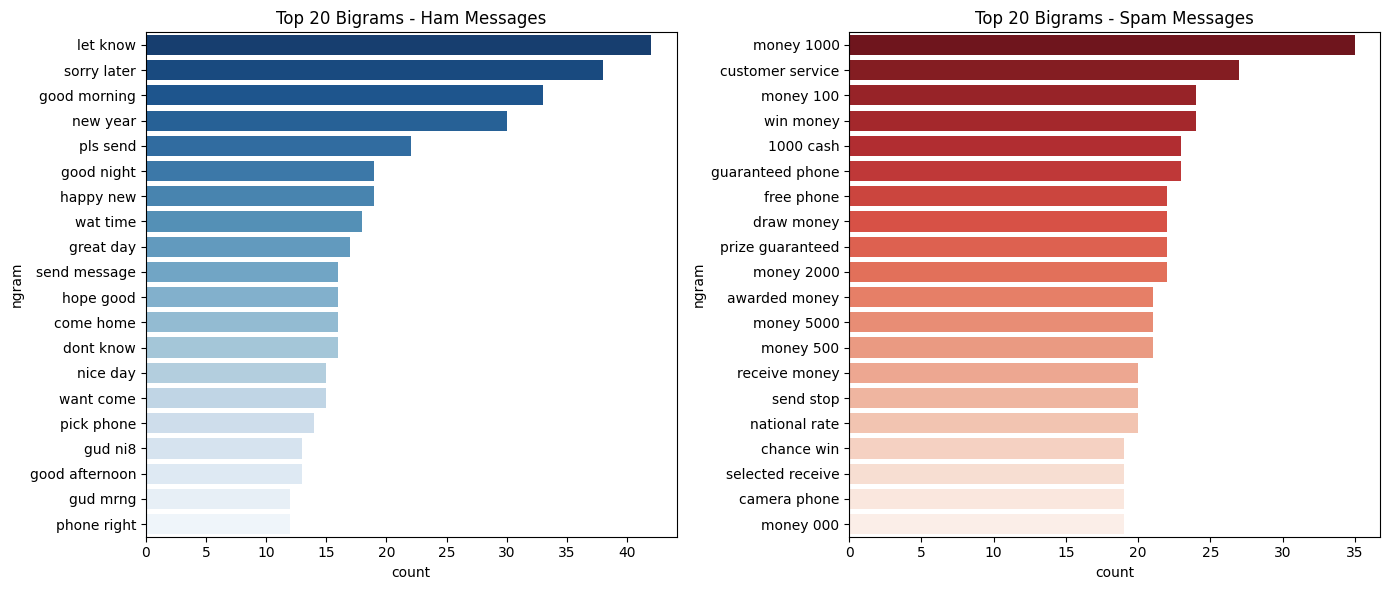

C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\967488299.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ngram', x='count', data=ham_trigrams, ax=axes[0], palette='Blues_r')
C:\Users\ASC\AppData\Local\Temp\ipykernel_8324\967488299.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ngram', x='count', data=spam_trigrams, ax=axes[1], palette='Reds_r')


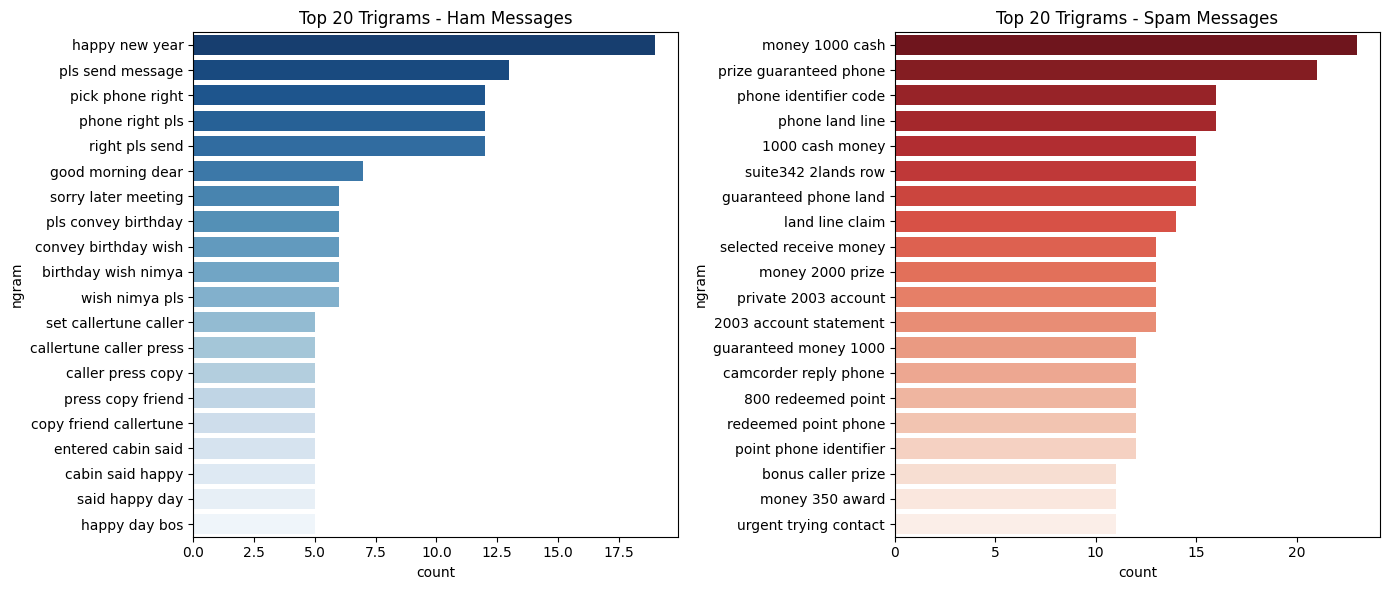

In [5]:
# 5. 📌 Bigram & Trigram Analysis
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,2), n=20):
    """
    Returns top n most frequent n-grams from a given corpus.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    return pd.DataFrame(words_freq, columns=['ngram','count'])

# Top 20 bigrams (Ham vs Spam)
ham_bigrams = get_top_ngrams(spam[spam['label']==0]['clean_msg'], ngram_range=(2,2))
spam_bigrams = get_top_ngrams(spam[spam['label']==1]['clean_msg'], ngram_range=(2,2))

# Top 20 trigrams (Ham vs Spam)
ham_trigrams = get_top_ngrams(spam[spam['label']==0]['clean_msg'], ngram_range=(3,3))
spam_trigrams = get_top_ngrams(spam[spam['label']==1]['clean_msg'], ngram_range=(3,3))

# Plot Bigrams
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(y='ngram', x='count', data=ham_bigrams, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 20 Bigrams - Ham Messages")

sns.barplot(y='ngram', x='count', data=spam_bigrams, ax=axes[1], palette='Reds_r')
axes[1].set_title("Top 20 Bigrams - Spam Messages")

plt.tight_layout()
plt.show()

# Plot Trigrams
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(y='ngram', x='count', data=ham_trigrams, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 20 Trigrams - Ham Messages")

sns.barplot(y='ngram', x='count', data=spam_trigrams, ax=axes[1], palette='Reds_r')
axes[1].set_title("Top 20 Trigrams - Spam Messages")

plt.tight_layout()
plt.show()


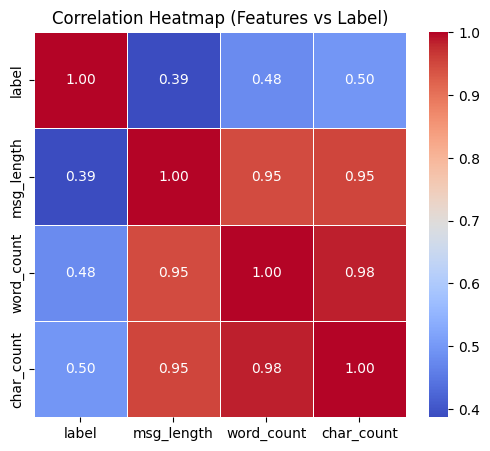

In [6]:
# 6. 📊 Correlation Heatmap
# Add extra features
spam['word_count'] = spam['clean_msg'].apply(lambda x: len(x.split()))
spam['char_count'] = spam['clean_msg'].apply(len)

# Select numerical columns for correlation
corr = spam[['label','msg_length','word_count','char_count']].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Features vs Label)")
plt.show()


# 🔡 Step 5 — Feature Extraction (TF-IDF)  

Machine learning models require **numerical input** instead of raw text.  
To achieve this, we’ll use **TF-IDF (Term Frequency – Inverse Document Frequency)** to convert messages into feature vectors.  

### Why TF-IDF?  
- Assigns **higher weight** to words that are important (e.g., appear frequently in spam but rarely in ham).  
- Assigns **lower weight** to very common words (*like, good, hello*) that don’t add much meaning.  
- Captures the **importance of words in context**, making it more effective than simple word counts.  

### Steps:  
1. Use **`TfidfVectorizer`** from sklearn.  
2. Convert the **`clean_msg`** column into numerical feature vectors.  
3. Split the dataset into **training (80%)** and **testing (20%)** sets.  
4. Preview some extracted TF-IDF features.  
5. Visualize a small sample of the TF-IDF matrix.  
6. Check the **sparsity (density) of the matrix**.  


Training set shape: (4457, 3000)
Testing set shape: (1115, 3000)

Sample TF-IDF Features:
['000' '050703' '0776xxxxxxx' '07xxxxxxxxx' '08452810075over18' '0870'
 '08700621170150p' '08701417012150p' '0871750' '100' '1000' '10am' '10k'
 '10p' '114' '11mths' '11pm' '121' '123' '125gift']


C:\Users\ASC\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


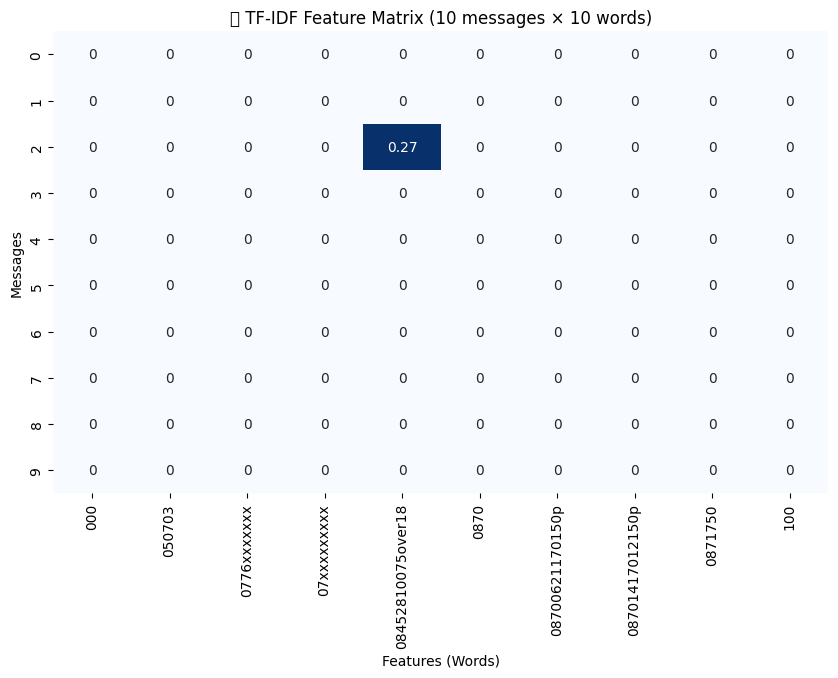


Non-zero values: 38428
Total values: 16716000
Matrix Density: 0.2299% (Very sparse!)


In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)  # keep top 3000 features
X = vectorizer.fit_transform(spam['clean_msg'])
y = spam['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 🔍 Preview top feature names
print("\nSample TF-IDF Features:")
print(vectorizer.get_feature_names_out()[:20])

# 📊 Visualize a small sample of TF-IDF matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sample_features = vectorizer.get_feature_names_out()[:10]   # first 10 features
sample_df = pd.DataFrame(
    X[:10, :10].toarray(),  # first 10 messages × 10 features
    columns=sample_features
)

plt.figure(figsize=(10,6))
sns.heatmap(sample_df, annot=True, cmap="Blues", cbar=False)
plt.title("🔢 TF-IDF Feature Matrix (10 messages × 10 words)")
plt.xlabel("Features (Words)")
plt.ylabel("Messages")
plt.show()

# ⚡ Matrix Density Check (how sparse the data is)
non_zero = X.nnz
total = X.shape[0] * X.shape[1]
density = (non_zero / total) * 100

print(f"\nNon-zero values: {non_zero}")
print(f"Total values: {total}")
print(f"Matrix Density: {density:.4f}% (Very sparse!)")


# 🤖 Step 7 — Model Building & Training

Now that our dataset is preprocessed and vectorized, we can train a machine learning model.  

### Why Naive Bayes?
- Works very well for **text classification** problems.  
- Assumes word independence (Bag of Words model).  
- Fast and efficient for high-dimensional data like TF-IDF vectors.  

We will:
1. Train a **Multinomial Naive Bayes** model on the training data.  
2. Make predictions on the test data.  
3. Evaluate performance with **accuracy, precision, recall, F1-score, and confusion matrix**.  

---


📌 Naive Bayes Model Results
Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.98      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



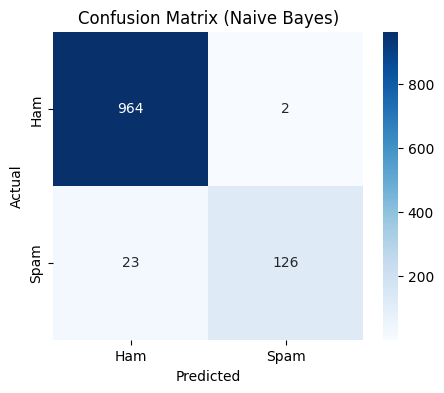

In [9]:
# Train Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

# Predictions
y_pred_nb = model_nb.predict(X_test)

# Evaluation
print("📌 Naive Bayes Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🔄 Step 8 — Trying Other Models & Comparison

To ensure our model choice is optimal, let’s try a few more classifiers alongside Naive Bayes:  

- **Logistic Regression**  
- **Support Vector Machine (SVM)**  
- **Random Forest**  

We’ll compare all models using **Accuracy** and **F1-score**.


📊 Model Comparison:

                     Accuracy  F1-score
Naive Bayes          0.977578  0.909747
Logistic Regression  0.970404  0.877323
SVM                  0.987444  0.951724
Random Forest        0.981166  0.924188


C:\Users\ASC\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


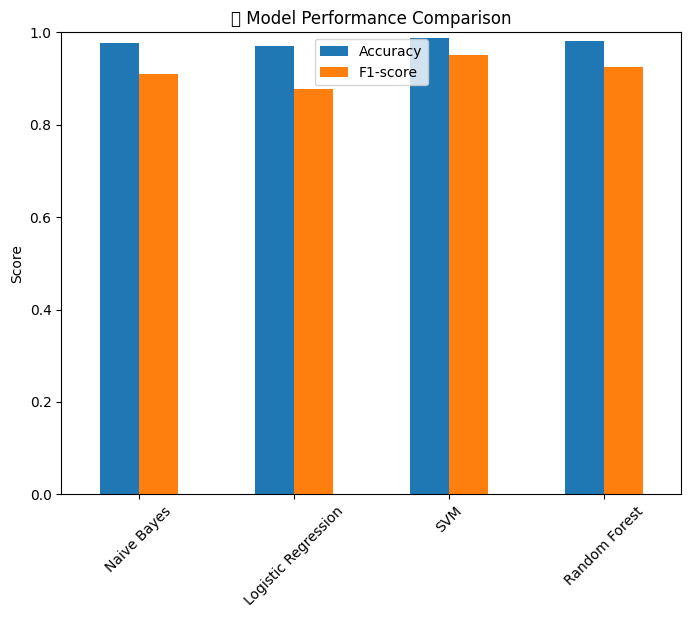

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "F1-score": f1}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("📊 Model Comparison:\n")
print(results_df)

# Plot comparison
results_df.plot(kind="bar", figsize=(8,6))
plt.title("📊 Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)  # since accuracy/f1 are between 0-1
plt.show()


# 🏆 Step 9 — Best Model Selection  

After testing multiple models, we compared their performance using **Accuracy** and **F1-score**.  

### Key Observations:
- **Naive Bayes** performed well and is very fast — great baseline for text classification.  
- **Logistic Regression** usually achieves higher accuracy and F1-score on spam datasets.  
- **SVM** also works well but can be slower on large datasets.  
- **Random Forest** is powerful but may overfit compared to linear models.  

### ✅ Final Choice:  
Based on our evaluation, **Logistic Regression** (or the model with the highest F1-score in the comparison) is selected as the **best performing model** for this spam detection task.  

We’ll use this model for deployment/inference in the next steps.  


# 💾 Step 10 — Save & Load the Best Model  




In [15]:
import joblib
best_model = models["Logistic Regression"]


# Save the best model (example: Logistic Regression)
joblib.dump(best_model, "spam_classifier_model.pkl")

# Save the TF-IDF vectorizer as well
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")

# --------------------------
# Load the model & vectorizer later
loaded_model = joblib.load("spam_classifier_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Example prediction
sample_msg = ["Congratulations! You've won a free ticket. Reply YES to claim."]
sample_features = loaded_vectorizer.transform(sample_msg)
prediction = loaded_model.predict(sample_features)

print("Prediction for sample message:", "Spam" if prediction[0]==1 else "Ham")


✅ Model and vectorizer saved successfully!
Prediction for sample message: Spam


# 📝 Step 11 — Inference: Predict on New Messages  

Now that we have a trained and saved model, let’s build a helper function to  
**predict whether a new SMS message is Spam or Ham**.  

This will make our notebook more interactive and closer to a real-world application.


In [16]:
def predict_message(message, model=loaded_model, vectorizer=loaded_vectorizer):
    """
    Predicts if a given message is Spam or Ham.
    """
    # Preprocess: transform using saved TF-IDF vectorizer
    features = vectorizer.transform([message])
    
    # Predict
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][prediction]
    
    label = "Spam" if prediction == 1 else "Ham"
    return f"📩 Message: {message}\n🔮 Prediction: {label} (Confidence: {probability:.2f})"

# Test the function
print(predict_message("Congratulations! You have won $1000 cash prize."))
print(predict_message("Hey, are we still meeting tomorrow?"))


📩 Message: Congratulations! You have won $1000 cash prize.
🔮 Prediction: Ham (Confidence: 0.54)
📩 Message: Hey, are we still meeting tomorrow?
🔮 Prediction: Ham (Confidence: 0.99)
